In [49]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd
import minisom
import LVQ

In [50]:
data = pd.read_csv(r"../data/SD-2X_rocktype.csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
y[y==4] = 0
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=44)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [51]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(x_train)
som.train_random(data = x_train, num_iteration = 100)

In [52]:
np.unique(y)

array([0, 1, 2, 3], dtype=int64)

In [53]:
labels = np.zeros((4, 10, 10))
propa = np.zeros((4, 10, 10))

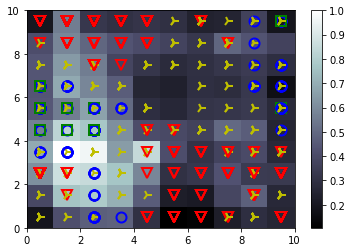

In [54]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['v', 's', 'o', '4']
colors = ['r', 'g', 'b', 'y']
for i, x in enumerate(x_train):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
    if y_train[i] == 0:
        labels[0, w[0], w[1]] += 1
    elif y_train[i] == 1:
        labels[1, w[0], w[1]] += 1
    elif y_train[i] == 2:
        labels[2, w[0], w[1]] += 1
    elif y_train[i] == 3:
        labels[3, w[0], w[1]] += 1
show()

In [55]:
for i in range(4):
    for j in range(10):
        for k in range(10):
            total = labels[0, j, k] + labels[1, j, k] + labels[2, j, k] + labels[3, j, k]
            if total == 0. :
                continue
            else:
                propa[i, j, k] = labels[i, j, k] / total
                propa[i, j, k] = round(propa[i, j, k], 2)

In [56]:
propa

array([[[0.  , 0.  , 0.91, 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 1.  ],
        [0.  , 0.33, 0.8 , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.6 , 1.  , 1.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  ],
        [1.  , 0.  , 1.  , 0.33, 0.75, 0.  , 0.  , 0.  , 1.  , 1.  ],
        [1.  , 1.  , 1.  , 1.  , 0.6 , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.29],
        [0.5 , 0.  , 1.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  ],
        [0.  , 0.75, 0.5 , 0.2 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [1.  , 0.  , 1.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.85, 0.84, 0.43, 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.88, 0.71, 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.11, 0.15, 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0. 

In [57]:
# parameter for LVQ
R = 50 # R is the # of initial prototype for each class
n_classes = 2
epsilon = 0.9
epsilon_dec_factor = 0.001

In [58]:
taggings = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        tmp = np.array([labels[0][i][j], labels[1][i][j], labels[2][i][j], labels[3][i][j]])
        sort = tmp.argsort()
        if (tmp[sort[3]]/tmp[sort[2]] < 5): # must be improve
            taggings[i][j] = np.random.choice([sort[3], sort[2]])
        else:
            taggings[i][j] = sort[3]

C:\Users\Thend\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Thend\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [59]:
from random import randint
p_vectors = []
count_death = 0
for i in range(10):
    for j in range(10):
        if(labels[0, i, i] == 0 and labels[1, i, i] == 0 and labels[2, i, i] == 0 and labels[3, i, i] == 0):
#             p = LVQ.prototype(randint(0,1), som.weights[(i,j)], epsilon)
#             p_vectors.append(p)
            count_death = count_death + 1
        elif(taggings[i][j] == 0):
            p = LVQ.prototype(0, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 1):
            p = LVQ.prototype(1, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 2):
            p = LVQ.prototype(2, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 3):
            p = LVQ.prototype(3, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
print("class id \t Initial prototype vector \n")
for p_v in p_vectors:
    print(p_v.class_id, '\t', p_v.p_vector)

class id 	 Initial prototype vector 

3 	 [0.20201746 0.31030636 0.6871637  0.38326115 0.19864232 0.45205871]
3 	 [0.14778316 0.2347549  0.8133375  0.32867112 0.15495348 0.35985706]
0 	 [0.09171741 0.15692141 0.88356025 0.27147957 0.10520963 0.31861363]
3 	 [0.15646772 0.24055051 0.71156121 0.40257911 0.14839197 0.47670099]
1 	 [0.22452761 0.37661093 0.33916171 0.55887623 0.14162553 0.60026699]
1 	 [0.21601624 0.42189672 0.15594397 0.58572702 0.10568409 0.62990186]
1 	 [0.29012916 0.44374856 0.22094003 0.59142772 0.18241772 0.53575631]
3 	 [0.38348051 0.44865259 0.30220924 0.58426665 0.31587343 0.34522397]
0 	 [0.40651794 0.43445122 0.34518334 0.55782726 0.38082199 0.26579526]
0 	 [0.41634414 0.38437732 0.42115906 0.5026297  0.471697   0.16248694]
3 	 [0.26859945 0.34586805 0.60126193 0.43436238 0.26655963 0.43242226]
0 	 [0.20831318 0.29094249 0.72776103 0.37350516 0.20148886 0.40276309]
3 	 [0.16228883 0.22994552 0.80122597 0.33752797 0.17525596 0.36631212]
2 	 [0.19941669 0.30497784

In [60]:
np.asarray(p_vectors).shape

(90,)

In [61]:
lvq = LVQ.LVQ(x_train, y_train, n_classes=2, n_neurons=R, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq.fit(x_train, y_train)

In [62]:
predicted_y = [lvq.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y, target_names=['0', '1', '2', '3']))

             precision    recall  f1-score   support

          0       1.00      0.85      0.92        54
          1       1.00      0.74      0.85        23
          2       0.75      0.38      0.50         8
          3       0.71      0.98      0.82        47

avg / total       0.88      0.85      0.85       132



In [63]:
A = np.array(predicted_y)-y_test
len(A[A==0])/len(A)

0.8484848484848485

In [64]:
data_new = pd.read_csv(r"../data/SD-3X_rocktype.csv")
x_new = data.iloc[:, 0:6].values
y_new = data.iloc[:, 6].values
y_new[y_new == 4] = 0
x_new = minmax.fit_transform(x_new)
predicted_y_new = [lvq.predict(instance) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y_new, target_names=['0', '1', '2', '3']))

             precision    recall  f1-score   support

          0       0.99      0.86      0.92       558
          1       0.85      0.84      0.84       165
          2       0.66      0.32      0.43       139
          3       0.71      0.94      0.81       453

avg / total       0.84      0.83      0.82      1315

